# TCR restriction for every patient so far

In [1]:
import pandas as pd
from nero import Harmonia, Hoplites
from glob import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
adata = sc.read("/covid/count_mat/run12345_combi_final2.h5ad")
adata = adata[~adata.obs.donor.isin(['Rep_C_1011', 'Rep_C_1035']),:]
# Split adata into runs
adata_split = {"run{}".format(n) : adata[adata.obs.run == run,:] for n, run in enumerate(adata.obs.run.unique())}
clono_list = sorted(glob("/covid/yun/TCR/clonotypes*"))

In [3]:
master_df = pd.DataFrame()

In [4]:
adata.obs

well          run  percent_mito   n_umi  \
AAACCTGAGAAGATTC-1-0-0  200423_lane1  200423_run1      0.016897  3906.0   
AAACCTGAGACGCACA-1-0-0  200423_lane1  200423_run1      0.065010  1046.0   
AAACCTGAGACTAAGT-1-0-0  200423_lane1  200423_run1      0.025267  2058.0   
AAACCTGAGCCATCGC-1-0-0  200423_lane1  200423_run1      0.031918  3415.0   
AAACCTGAGCTATGCT-1-0-0  200423_lane1  200423_run1      0.044571  1234.0   
...                              ...          ...           ...     ...   
TTTGTCATCAGCGATT-1-5-4  200605_lane6  200605_run5      0.044663  7926.0   
TTTGTCATCAGGTTCA-1-5-4  200605_lane6  200605_run5      0.075439   570.0   
TTTGTCATCAGTGTTG-1-5-4  200605_lane6  200605_run5      0.064576  2710.0   
TTTGTCATCCAAGTAC-1-5-4  200605_lane6  200605_run5      0.035937  7068.0   
TTTGTCATCCTAGTGA-1-5-4  200605_lane6  200605_run5      0.053383  2941.0   

                        n_genes             barcode assignment  \
AAACCTGAGAAGATTC-1-0-0     1320  AAACCTGAGAAGATTC-0        SNG   
AAACCTGAGACGCACA-1-0-0      498  AAACCTGAGACGCACA-0        SNG   
AAACCTGAGACTAAGT-1-0-0      890  AAACCTGAGACTAAGT-0        SNG   
AAACCTGAGCCATCGC-1-0-0     1560  AAACCTGAGCCATCGC-0        SNG   
AAACCTGAGCTATGCT-1-0-0      561  AAACCTGAGCTATGCT-0        SNG   
...                         ...                 ...        ...   
TTTGTCATCAGCGATT-1-5-4     2417  TTTGTCATCAGCGATT-5        SNG   
TTTGTCATCAGGTTCA-1-5-4      284  TTTGTCATCAGGTTCA-5        SNG   
TTTGTCATCAGTGTTG-1-5-4     1145  TTTGTCATCAGTGTTG-5        SNG   
TTTGTCATCCAAGTAC-1-5-4     2014  TTTGTCATCCAAGTAC-5        SNG   
TTTGTCATCCTAGTGA-1-5-4     1137  TTTGTCATCCTAGTGA-5        SNG   

                        freemux_cluster scrublet  n_counts  ...    GGT1-1  \
AAACCTGAGAAGATTC-1-0-0                2      SNG    3906.0  ...  1.479644   
AAACCTGAGACGCACA-1-0-0                7      SNG    1046.0  ...  1.897901   
AAACCTGAGACTAAGT-1-0-0                0      SNG    2058.0  ...  1.592165   
AAACCTGAGCCATCGC-1-0-0                3      SNG    3414.0  ...  1.675170   
AAACCTGAGCTATGCT-1-0-0                9      SNG    1234.0  ...  2.094133   
...                                 ...      ...       ...  ...       ...   
TTTGTCATCAGCGATT-1-5-4               21      SNG    7926.0  ...  1.593161   
TTTGTCATCAGGTTCA-1-5-4               10      SNG     570.0  ...  1.771344   
TTTGTCATCAGTGTTG-1-5-4               14      SNG    2710.0  ...  1.468829   
TTTGTCATCCAAGTAC-1-5-4               21      SNG    7067.0  ...  2.120684   
TTTGTCATCCTAGTGA-1-5-4               20      SNG    2941.0  ...  1.680010   

                       TNFSF14-1       DR3    EGFR-1    cell_type_highres  \
AAACCTGAGAAGATTC-1-0-0  1.160761  0.868336  1.424757  central_memory_CD4T   
AAACCTGAGACGCACA-1-0-0  1.521341  1.061458  1.278155                cMono   
AAACCTGAGACTAAGT-1-0-0  1.101873  0.842044  1.442111          memory_CD4T   
AAACCTGAGCCATCGC-1-0-0  1.202493  0.860329  1.448289      T_boundplatelet   
AAACCTGAGCTATGCT-1-0-0  1.430983  0.877767  1.574764            ISG_cMono   
...                          ...       ...       ...                  ...   
TTTGTCATCAGCGATT-1-5-4  1.407944  0.922187  1.633517               ncMono   
TTTGTCATCAGGTTCA-1-5-4  1.272756  0.903961  1.498104       Megakaryocytes   
TTTGTCATCAGTGTTG-1-5-4  1.314815  1.260804  1.418170            EMRA_CD4T   
TTTGTCATCCAAGTAC-1-5-4  1.264018  0.674574  1.353770                cMono   
TTTGTCATCCTAGTGA-1-5-4  1.459923  0.843539  1.306694   CD8T_boundplatelet   

                       cell_type_highres_mRNA cell_type_major_highres  \
AAACCTGAGAAGATTC-1-0-0             naive_CD4T                    CD4T   
AAACCTGAGACGCACA-1-0-0                  cMono                Monocyte   
AAACCTGAGACTAAGT-1-0-0            memory_CD4T                    CD4T   
AAACCTGAGCCATCGC-1-0-0     CD8T_boundplatelet          leuko_platelet   
AAACCTGAGCTATGCT-1-0-0              ISG_cMono                Monocyte   
...                                       ...     

In [5]:
for n, clono in enumerate(clono_list):
    df = pd.read_csv(clono, sep='\t')
    df = df.merge(adata_split["run{}".format(n)].obs[['barcode', 'donor', 'timepoint', 'COVID_status']], on='barcode', how='left')
    df.dropna(axis=0, subset=['donor'], inplace=True)
    hop = Hoplites.Hoplites(meta=None, clonotypes=df, verbose=True)
    hop.summary(genotypes='donor')
    gini_df = hop.gini(plot=False)
    gini_df = gini_df.merge(hop.clonotypes[['donor', 'timepoint', 'COVID_status']].drop_duplicates(), left_on='ID', right_on='donor', how='left')
    gini_df.drop('donor', axis=1, inplace=True)
    master_df = pd.concat([master_df, gini_df], ignore_index=True)

Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can be also found in Hoplites.summary_attr
Clonotype frequencies can

In [6]:
master_df = master_df[master_df.ID != "None"].sort_values("COVID_status", axis=0)

In [8]:
master_df.to_csv("out_gini_12345.csv", index=False)

[Text(0, 0, 'Rep_C_1021'),
 Text(0, 0, 'Rep_C_1008'),
 Text(0, 0, 'Rep_C_1020'),
 Text(0, 0, 'Rep_C_1009'),
 Text(0, 0, 'Rep_C_1017'),
 Text(0, 0, 'Rep_C_1016'),
 Text(0, 0, 'Rep_C_1010'),
 Text(0, 0, 'Rep_C_1028'),
 Text(0, 0, 'Rep_C_1040'),
 Text(0, 0, 'Rep_C_1030'),
 Text(0, 0, 'ICC_C_0001'),
 Text(0, 0, 'ICC_C_0003'),
 Text(0, 0, 'ICC_C_0005'),
 Text(0, 0, 'ICC_C_0004'),
 Text(0, 0, 'ICC_C_0002'),
 Text(0, 0, 'Rep_C_1014'),
 Text(0, 0, 'Rep_C_1005'),
 Text(0, 0, 'Rep_C_1018'),
 Text(0, 0, 'Rep_C_1023'),
 Text(0, 0, 'Rep_C_1025'),
 Text(0, 0, 'Rep_C_1026'),
 Text(0, 0, 'Rep_C_1003'),
 Text(0, 0, 'Rep_C_1002'),
 Text(0, 0, 'Rep_C_1001'),
 Text(0, 0, 'Rep_C_1033'),
 Text(0, 0, 'Rep_C_1006'),
 Text(0, 0, 'Rep_C_1015'),
 Text(0, 0, 'Rep_C_1029'),
 Text(0, 0, 'Rep_C_1036'),
 Text(0, 0, 'Rep_C_1037'),
 Text(0, 0, 'Rep_C_1038'),
 Text(0, 0, 'Rep_C_1012'),
 Text(0, 0, 'Rep_C_1007')]

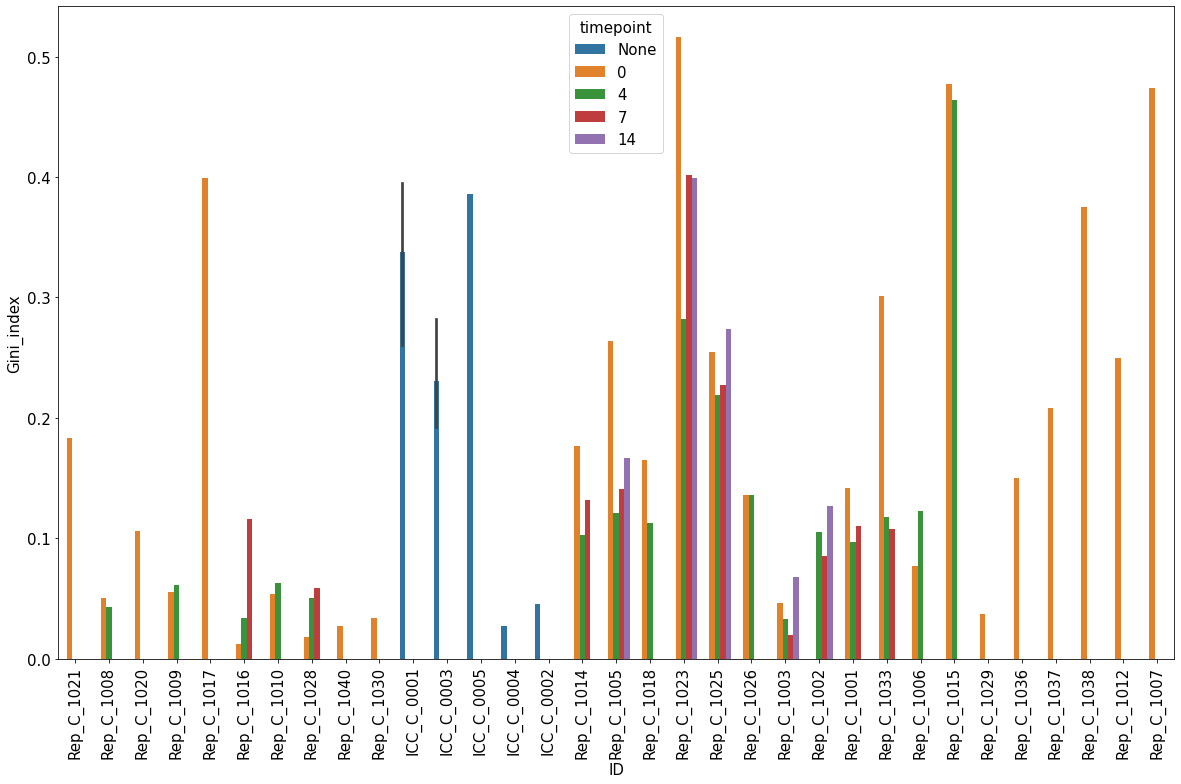

In [7]:
plt.figure(figsize=(20, 12))
plt.rc('font', size=15)
g = sns.barplot(x="ID", y="Gini_index", hue="timepoint", data=master_df, hue_order = ['None', '0','4','7','14'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
